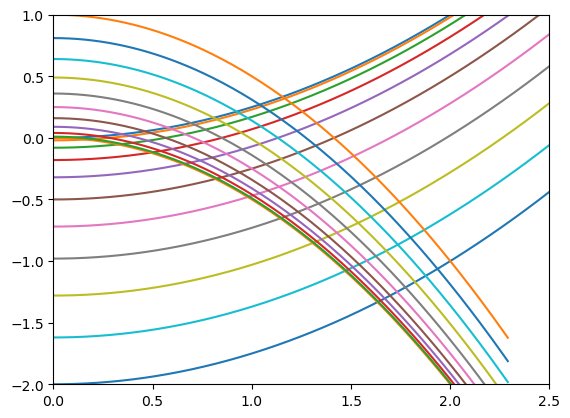

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#D±2までの近似
for beta in range(0, 11):#β_x
 
 beta_x = beta/10

 
 q_x = np.arange(-2.5, 1.0, 0.01)#q_xの範囲

 a_x = beta_x**2 - q_x**2 / 2#q_xのa_xの関係式

 q_z = -2 * q_x#q_xとq_zの関係式
 a_z = -2 * a_x#a_xとa_zの関係式

 plt.plot(q_z, a_z)

for beta_z in range(0, 11):#β_z
 beta_z1 = beta_z / 10

 q_z = np.arange(-2.5, 2.3, 0.01)#q_zの範囲

 a_z = beta_z1**2 - q_z**2 / 2#q_zとa_zの関係式

 plt.plot(q_z, a_z)
  
plt.xlim(0, 2.5)
plt.ylim(-2, 1)  
plt.show()

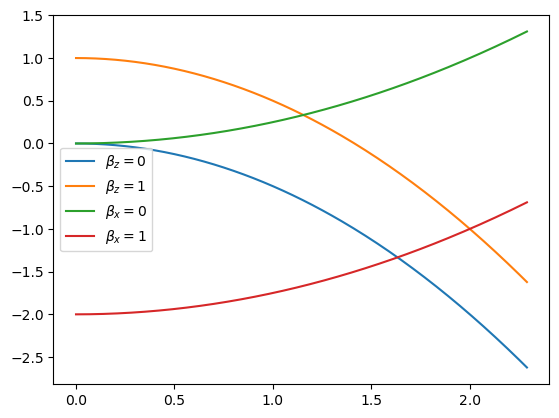

In [86]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2.3, 0.01)

yz_0 = -x**2 /2#z; β_z = 0
yz_1 = -x**2/2 + 1#z; β_z = 1
yr_0 = x**2 / 4#r; β_r = 0
yr_1 = x**2 / 4 - 2#r; β_r = 1

plt.plot(x, yz_0, label = r'$\beta_z = 0$')
plt.plot(x, yz_1, label = r'$\beta_z = 1$')
plt.plot(x, yr_0, label = r'$\beta_x = 0$')
plt.plot(x, yr_1, label = r'$\beta_x = 1$')
#plt.xlim(0, 2.5)
#plt.ylim(-2, 0.5)
plt.legend()
plt.show()

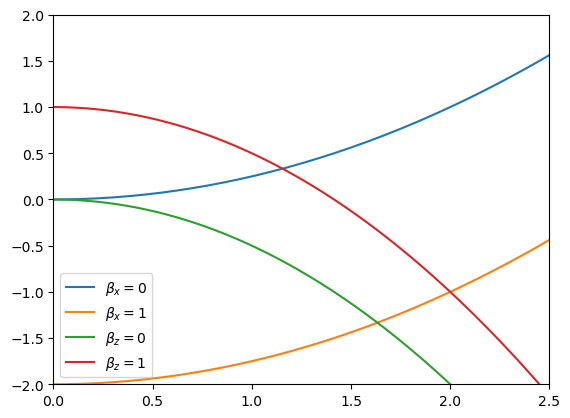

In [87]:
import numpy as np
import matplotlib.pyplot as plt
 
beta_x = 0
 
q_x = np.arange(-2.5, 2.5, 0.01)

q_z = -2 * q_x

a_x = beta_x**2 - q_x**2 / 2

a_z = -2 * a_x

plt.plot(q_z, a_z, label = r'$\beta_x = 0$')

beta_x = 1
 
q_x = np.arange(-2.5, 2.5, 0.01)

q_z = -2 * q_x

a_x = beta_x**2 - q_x**2 / 2

a_z = -2 * a_x

plt.plot(q_z, a_z, label = r'$\beta_x = 1$')

beta_z = 0

q_z = np.arange(-2.5, 2.5, 0.01)

a_z = beta_z**2 - q_z**2 / 2

plt.plot(q_z, a_z, label = r'$\beta_z = 0$')

beta_z = 1

q_z = np.arange(-2.5, 2.5, 0.01)

a_z = beta_z1**2 - q_z**2 / 2

plt.plot(q_z, a_z, label = r'$\beta_z = 1$')
  
plt.xlim(0, 2.5)
plt.ylim(-2, 2)
plt.legend()
plt.show()

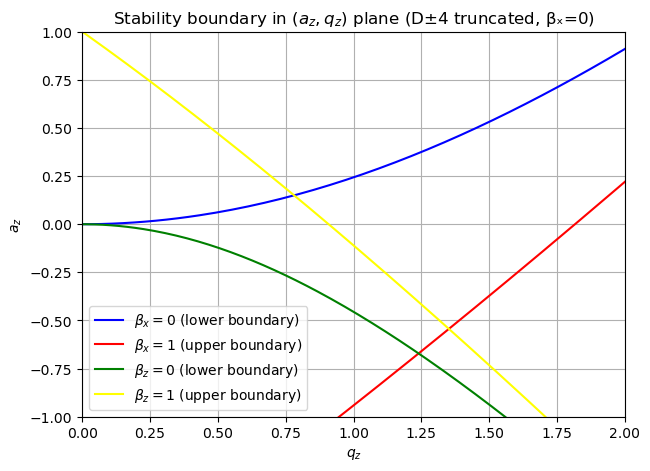

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#D±4までの近似
#動径方向の安定領域

#β_xの下限
beta_x = 0.0
q = np.linspace(-2.0, 2.0, 400)#q_xの範囲を定義
a_xlist = []
a_zlist = []
q_zlist = []

def f(a_x, q_x, beta_x):#関数を定義
    
     S_1 = (a_x - (2 + beta_x)**2)*(a_x - (4 + beta_x)**2) - q_x**2#D_4の分母
     S_2 = (a_x - (-2 + beta_x)**2)*(a_x - (-4 + beta_x)**2) - q_x**2#D_-4の分母
     S = (a_x - (4 + beta_x)**2)/ S_1 + (a_x - (-4 + beta_x)**2)/ S_2#連分数
     return  beta_x**2 - a_x + q_x**2 * S#方程式

a_guess = 0.0#初期値

for q_x in q:#q_xを動かす

 ax_vals = fsolve(f, a_guess, args= (q_x, beta_x))#解を求める

 a_x = ax_vals[0]

 a_xlist.append(a_x)
 a_zlist.append(-2 * a_x)
 q_zlist.append(-2 * q_x)

 a_guess = a_x


#β_xの上限
beta_x = 1.0
a_xlist1 = []
a_zlist1 = []
q_zlist1 = []


a_guess1 = 0.0#初期化

for q_x1 in q:#q_xを動かす

 ax_vals1 = fsolve(f, a_guess1, args= (q_x1, beta_x))#解を求める

 a_x1 = ax_vals1[0]

 a_xlist1.append(a_x1)
 a_zlist1.append(-2 * a_x1)
 q_zlist1.append(-2 * q_x1)

 a_guess1 = a_x1


#z軸方向の安定領域

#β_zの下限
beta_z = 0.0
q = np.linspace(-2.0, 2.0, 400)#q_zの範囲を定義
a_zlist0 = []
q_zlist0 = []

def f(a_z, q_z, beta_z):#関数を定義
    
     S_1 = (a_z - (2 + beta_z)**2)*(a_z - (4 + beta_z)**2) - q_z**2#D_4の分母
     S_2 = (a_z - (-2 + beta_z)**2)*(a_z - (-4 + beta_z)**2) - q_z**2#D_-4の分母
     S = (a_z - (4 + beta_z)**2)/ S_1 + (a_z - (-4 + beta_z)**2)/ S_2#連分数
     return  beta_z**2 - a_z + q_z**2 * S#方程式

a_guess = 0.0#初期値

for q_z in q:#q_xを動かす

 az_vals = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

 a_z = az_vals[0]

 a_zlist0.append(a_z)
 q_zlist0.append(q_z)

 a_guess = a_z

#β_zの上限
beta_z = 1.0

a_zlist01 = []
q_zlist01 = []

a_guess = 0.0#初期値

for q_z in q:#q_xを動かす

 az_vals = fsolve(f, a_guess, args= (q_z, beta_z))#解を求める

 a_z = az_vals[0]

 a_zlist01.append(a_z)
 q_zlist01.append(q_z)

 a_guess = a_z

plt.figure(figsize=(7,5))
plt.plot(q_zlist, a_zlist, color='blue', label=r'$\beta_x = 0$ (lower boundary)')
plt.plot(q_zlist1, a_zlist1, color='red', label=r'$\beta_x = 1$ (upper boundary)')
plt.plot(q_zlist0, a_zlist0, color='green', label=r'$\beta_z = 0$ (lower boundary)')
plt.plot(q_zlist01, a_zlist01, color='yellow', label=r'$\beta_z = 1$ (upper boundary)')
plt.xlabel(r'$q_z$')
plt.ylabel(r'$a_z$')
plt.title('Stability boundary in $(a_z, q_z)$ plane (D±4 truncated, βₓ=0)')
plt.grid(True)
plt.xlim(0, 2)
plt.ylim(-1, 1)
plt.legend()
plt.show()
